# Breast Cancer Prediction

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
df = pd.read_csv('Breast_cancer_data.csv')
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[0.1857749  0.11949647 0.30542971 0.28018765 0.10911128]


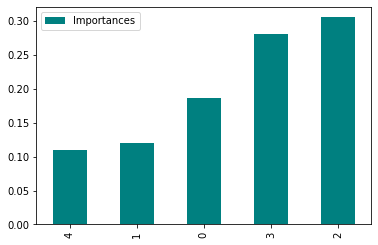

In [3]:
X = df[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']]
Y = df[['diagnosis']]
model = RandomForestClassifier(n_estimators=340)
model.fit(X,Y)
feature_importances = model.feature_importances_
print(feature_importances)
importance_df = pd.DataFrame({"Features":pd.DataFrame(X).columns,"Importances":feature_importances})
importance_df.set_index("Importances")
importance_df = importance_df.sort_values("Importances")
importance_df.plot.bar(color="teal")

In [4]:
x_new = df[['mean_radius','mean_perimeter','mean_area']]
y_new = df[['diagnosis']]
x_train,x_test,y_train,y_test = train_test_split(x_new,y_new,random_state=42,test_size=0.3)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(398, 3) (171, 3)
(398, 1) (171, 1)


In [5]:
linear = LogisticRegression()
linear.fit(x_train,y_train)
y_pred = linear.predict(x_test)
score = accuracy_score(y_test,y_pred)
print(score)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9239766081871345


In [6]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [7]:
classifier = RandomForestClassifier(n_estimators=85, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
score = accuracy_score(y_test,y_pred)
print(score)

0.9239766081871345


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [8]:
model = Sequential([Dense(64, activation='relu',input_shape=(3,)),    
                    Dense(64, activation='relu'),
                    Dense(1, activation='sigmoid'),])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

hist = model.fit(x_train,y_train,batch_size=32, epochs=256)

Epoch 1/256
398/398 [==============================] - 1s 3ms/step - loss: 0.6716 - accuracy: 0.6407
Epoch 2/256
398/398 [==============================] - 0s 70us/step - loss: 0.5067 - accuracy: 0.8643
Epoch 3/256
398/398 [==============================] - 0s 70us/step - loss: 0.4067 - accuracy: 0.8643
Epoch 4/256
398/398 [==============================] - 0s 65us/step - loss: 0.3473 - accuracy: 0.8693
Epoch 5/256
398/398 [==============================] - 0s 73us/step - loss: 0.3227 - accuracy: 0.8693
Epoch 6/256
398/398 [==============================] - 0s 68us/step - loss: 0.3124 - accuracy: 0.8693
Epoch 7/256
398/398 [==============================] - 0s 63us/step - loss: 0.3088 - accuracy: 0.8693
Epoch 8/256
398/398 [==============================] - 0s 78us/step - loss: 0.3070 - accuracy: 0.8693
Epoch 9/256
398/398 [==============================] - 0s 78us/step - loss: 0.3063 - accuracy: 0.8693
Epoch 10/256
398/398 [==============================] - 0s 68us/step - loss: 0.3057

398/398 [==============================] - 0s 65us/step - loss: 0.2460 - accuracy: 0.8995
Epoch 81/256
398/398 [==============================] - 0s 65us/step - loss: 0.2478 - accuracy: 0.9020
Epoch 82/256
398/398 [==============================] - 0s 68us/step - loss: 0.2486 - accuracy: 0.8945
Epoch 83/256
398/398 [==============================] - 0s 65us/step - loss: 0.2448 - accuracy: 0.8920
Epoch 84/256
398/398 [==============================] - 0s 53us/step - loss: 0.2435 - accuracy: 0.9020
Epoch 85/256
398/398 [==============================] - 0s 55us/step - loss: 0.2438 - accuracy: 0.8995
Epoch 86/256
398/398 [==============================] - 0s 53us/step - loss: 0.2428 - accuracy: 0.8995
Epoch 87/256
398/398 [==============================] - 0s 63us/step - loss: 0.2429 - accuracy: 0.8945
Epoch 88/256
398/398 [==============================] - 0s 53us/step - loss: 0.2422 - accuracy: 0.8970
Epoch 89/256
398/398 [==============================] - 0s 65us/step - loss: 0.2431 - 

398/398 [==============================] - 0s 68us/step - loss: 0.2295 - accuracy: 0.9045
Epoch 159/256
398/398 [==============================] - 0s 60us/step - loss: 0.2345 - accuracy: 0.9020
Epoch 160/256
398/398 [==============================] - 0s 65us/step - loss: 0.2301 - accuracy: 0.9095
Epoch 161/256
398/398 [==============================] - 0s 58us/step - loss: 0.2333 - accuracy: 0.8995
Epoch 162/256
398/398 [==============================] - 0s 63us/step - loss: 0.2301 - accuracy: 0.9070
Epoch 163/256
398/398 [==============================] - 0s 65us/step - loss: 0.2321 - accuracy: 0.9070
Epoch 164/256
398/398 [==============================] - 0s 60us/step - loss: 0.2329 - accuracy: 0.8970
Epoch 165/256
398/398 [==============================] - 0s 63us/step - loss: 0.2352 - accuracy: 0.9070
Epoch 166/256
398/398 [==============================] - 0s 60us/step - loss: 0.2367 - accuracy: 0.8995
Epoch 167/256
398/398 [==============================] - 0s 63us/step - loss: 

398/398 [==============================] - 0s 68us/step - loss: 0.2245 - accuracy: 0.9020
Epoch 237/256
398/398 [==============================] - 0s 65us/step - loss: 0.2216 - accuracy: 0.9121
Epoch 238/256
398/398 [==============================] - 0s 65us/step - loss: 0.2216 - accuracy: 0.9045
Epoch 239/256
398/398 [==============================] - 0s 63us/step - loss: 0.2213 - accuracy: 0.9095
Epoch 240/256
398/398 [==============================] - 0s 63us/step - loss: 0.2212 - accuracy: 0.9070
Epoch 241/256
398/398 [==============================] - 0s 65us/step - loss: 0.2270 - accuracy: 0.9095
Epoch 242/256
398/398 [==============================] - 0s 68us/step - loss: 0.2221 - accuracy: 0.8995
Epoch 243/256
398/398 [==============================] - 0s 65us/step - loss: 0.2224 - accuracy: 0.9070
Epoch 244/256
398/398 [==============================] - 0s 60us/step - loss: 0.2217 - accuracy: 0.9045
Epoch 245/256
398/398 [==============================] - 0s 65us/step - loss: 

In [9]:
model.evaluate(x_test, y_test)

171/171 [==============================] - 0s 201us/step


[0.15560583953271834, 0.9356725215911865]

In [10]:
mean_radius = 14.05
mean_perimeter = 91.38
mean_area = 600.4
new_data = np.array([[mean_radius, mean_perimeter, mean_area]])
prediction = model.predict(new_data)
prediction

array([[0.]], dtype=float32)

In [11]:
import gradio as gr

def predictions(mean_radius, mean_perimeter, mean_area):
    new_data = np.array([[mean_radius, mean_perimeter, mean_area]])
    prediction = linear.predict(new_data)
    if prediction[0] == 0:
        return "Negative 🎉"
    else:
        return "Positive 😞"

def something(hello):
    print("Hello" + hello)

iface = gr.Interface(
  fn=predictions,
  inputs=["number", "number", "number"],
  outputs=[ "text"])
   #interpretation="default"
iface.launch('share=True')

Running locally at: http://127.0.0.1:7860/
To create a public link, set `share=True` in `launch()`.
Interface loading below...


(<Flask 'gradio.networking'>, 'http://127.0.0.1:7860/', None)